In [1]:
%matplotlib notebook

import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy import read_events
import matplotlib.pyplot as plt
client = Client("IRIS")
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import numpy as np
import math
import pandas as pd

catalog = read_events('http://ds.iris.edu/files/insight/2020-01-01/events_extended_preferredorigin_2020-01-01.xml')

In [2]:
print(catalog)

383 Event(s) in Catalog:
2019-12-31T17:30:00.000000Z |  +4.502, +135.623 | 1.6 M2.4 | manual
2019-12-30T18:22:51.000000Z |  +4.502, +135.623 | 1.6 M2.4 | manual
...
2019-03-14T20:59:38.000000Z |  +4.502, +135.623 | 3.3 MFB | manual
2019-01-13T05:53:29.000000Z |  +4.502, +135.623 | 1.9 MFB | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'


In [4]:
#most of the 2.4Hz events fall below a 2.0MFB Magnitude -> can filter the read_events func
catalog2 = catalog.filter('magnitude < 2.0')
print(catalog2)

333 Event(s) in Catalog:
2019-12-31T17:30:00.000000Z |  +4.502, +135.623 | 1.6 M2.4 | manual
2019-12-30T18:22:51.000000Z |  +4.502, +135.623 | 1.6 M2.4 | manual
...
2019-03-26T06:20:00.000000Z |  +4.502, +135.623 | 1.3 M2.4 | manual
2019-01-13T05:53:29.000000Z |  +4.502, +135.623 | 1.9 MFB | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'


In [55]:
#prints out UTCDateTime objects
for event in catalog:
    print(event.origins[0].time)
    
print(type(event.origins[0].time))

2019-12-31T17:30:00.000000Z
2019-12-30T18:22:51.000000Z
2019-12-30T15:46:43.000000Z
2019-12-29T14:36:06.000000Z
2019-12-28T18:02:08.000000Z
2019-12-28T14:52:30.000000Z
2019-12-27T15:06:37.000000Z
2019-12-27T13:50:37.000000Z
2019-12-27T12:37:42.000000Z
2019-12-26T16:38:20.000000Z
2019-12-26T14:45:04.000000Z
2019-12-26T13:04:26.000000Z
2019-12-26T11:49:57.000000Z
2019-12-25T15:43:18.000000Z
2019-12-25T15:22:37.000000Z
2019-12-25T14:32:24.000000Z
2019-12-24T14:31:50.000000Z
2019-12-23T13:49:15.000000Z
2019-12-23T13:30:47.000000Z
2019-12-23T11:45:35.000000Z
2019-12-23T11:06:00.000000Z
2019-12-23T10:52:43.000000Z
2019-12-23T09:59:27.000000Z
2019-12-22T15:21:55.000000Z
2019-12-21T13:43:26.000000Z
2019-12-21T12:22:36.000000Z
2019-12-20T13:08:30.000000Z
2019-12-20T07:53:37.000000Z
2019-12-19T11:57:20.000000Z
2019-12-19T10:51:09.000000Z
2019-12-19T10:01:16.000000Z
2019-12-18T11:53:30.000000Z
2019-12-17T16:32:22.000000Z
2019-12-17T10:13:55.000000Z
2019-12-16T11:45:12.000000Z
2019-12-16T10:02:02.

In [24]:
event_times = []

for event in catalog:
    times = event.origins[0].time
    event_times.append(times)

print(event_times)
print(type(event_times))   #event_times is a list

[UTCDateTime(2019, 12, 31, 17, 30), UTCDateTime(2019, 12, 30, 18, 22, 51), UTCDateTime(2019, 12, 30, 15, 46, 43), UTCDateTime(2019, 12, 29, 14, 36, 6), UTCDateTime(2019, 12, 28, 18, 2, 8), UTCDateTime(2019, 12, 28, 14, 52, 30), UTCDateTime(2019, 12, 27, 15, 6, 37), UTCDateTime(2019, 12, 27, 13, 50, 37), UTCDateTime(2019, 12, 27, 12, 37, 42), UTCDateTime(2019, 12, 26, 16, 38, 20), UTCDateTime(2019, 12, 26, 14, 45, 4), UTCDateTime(2019, 12, 26, 13, 4, 26), UTCDateTime(2019, 12, 26, 11, 49, 57), UTCDateTime(2019, 12, 25, 15, 43, 18), UTCDateTime(2019, 12, 25, 15, 22, 37), UTCDateTime(2019, 12, 25, 14, 32, 24), UTCDateTime(2019, 12, 24, 14, 31, 50), UTCDateTime(2019, 12, 23, 13, 49, 15), UTCDateTime(2019, 12, 23, 13, 30, 47), UTCDateTime(2019, 12, 23, 11, 45, 35), UTCDateTime(2019, 12, 23, 11, 6), UTCDateTime(2019, 12, 23, 10, 52, 43), UTCDateTime(2019, 12, 23, 9, 59, 27), UTCDateTime(2019, 12, 22, 15, 21, 55), UTCDateTime(2019, 12, 21, 13, 43, 26), UTCDateTime(2019, 12, 21, 12, 22, 36), U

In [21]:
#creating waveforms (times are already 3min ahead of energy start)
def cat_waveforms(start, adjtime):
    start_t = start - adjtime
    end_t = start + 2*adjtime
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st

[UTCDateTime(2019, 12, 31, 17, 30), UTCDateTime(2019, 12, 30, 18, 22, 51), UTCDateTime(2019, 12, 30, 15, 46, 43), UTCDateTime(2019, 12, 29, 14, 36, 6), UTCDateTime(2019, 12, 28, 18, 2, 8)]


<IPython.core.display.Javascript object>


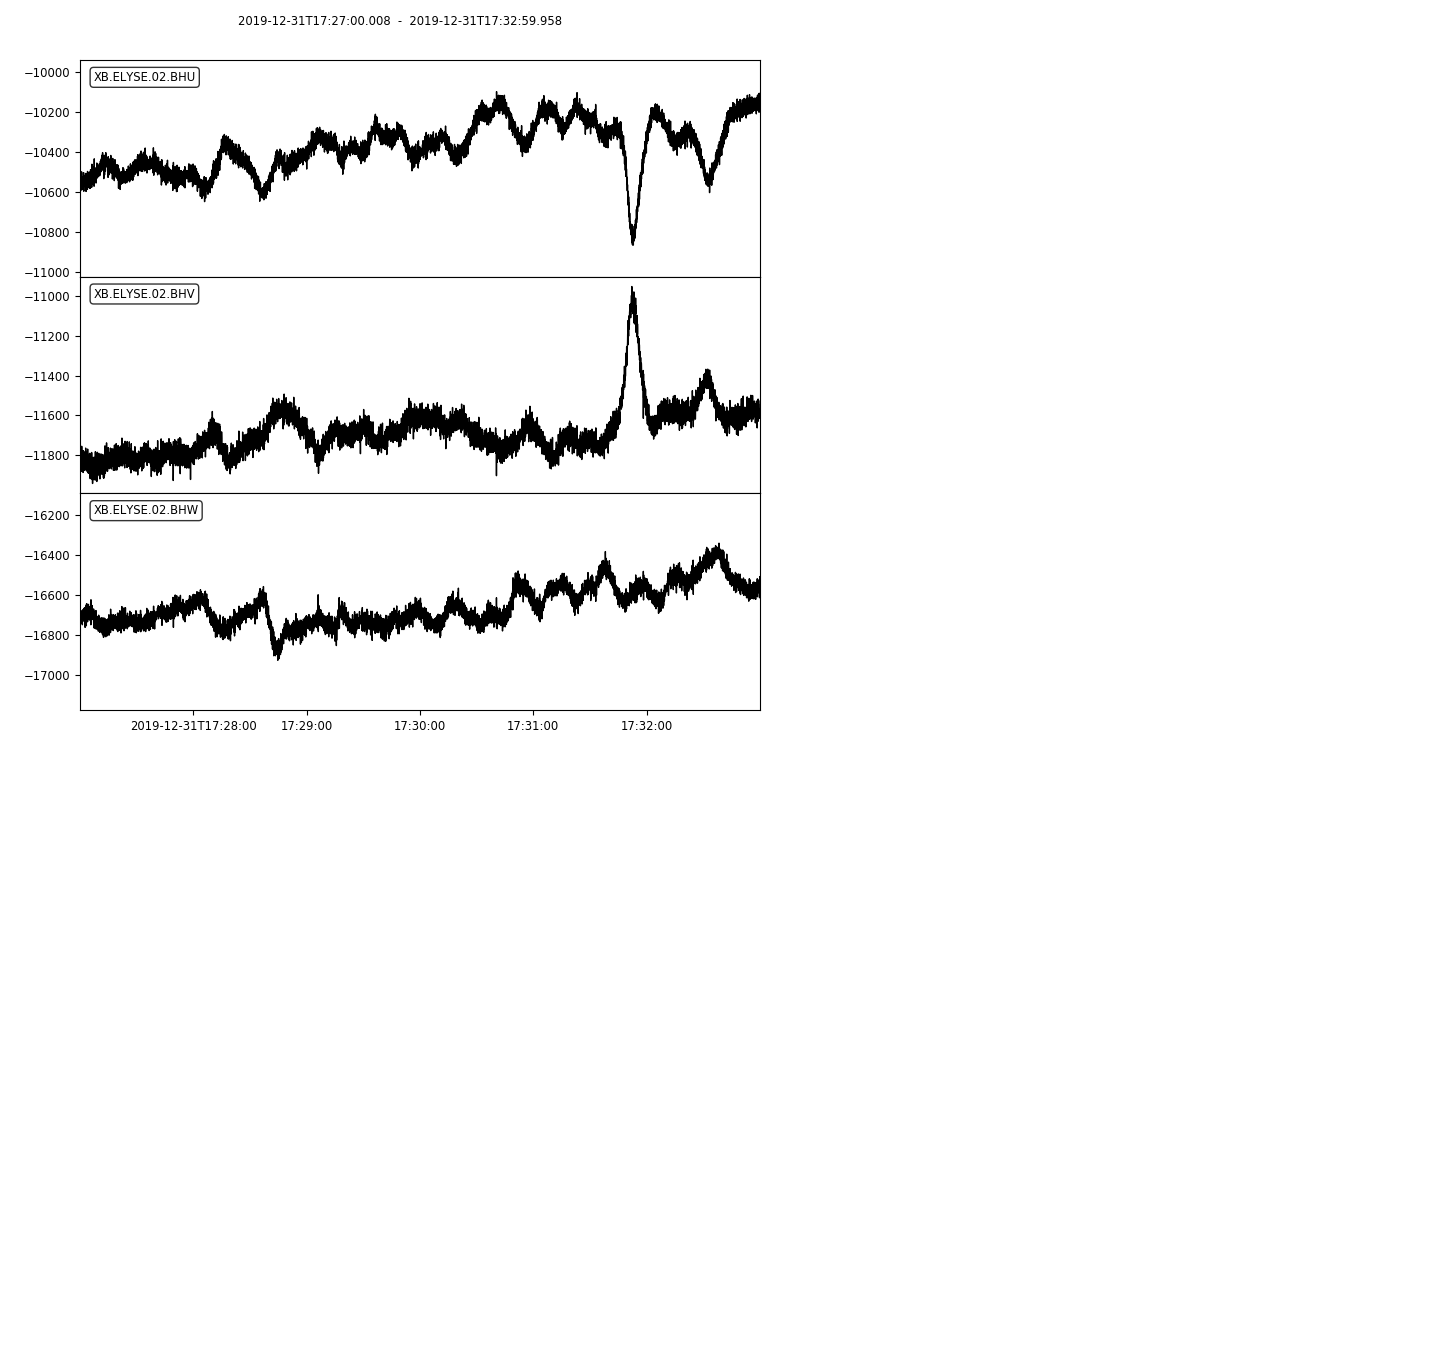

<IPython.core.display.Javascript object>


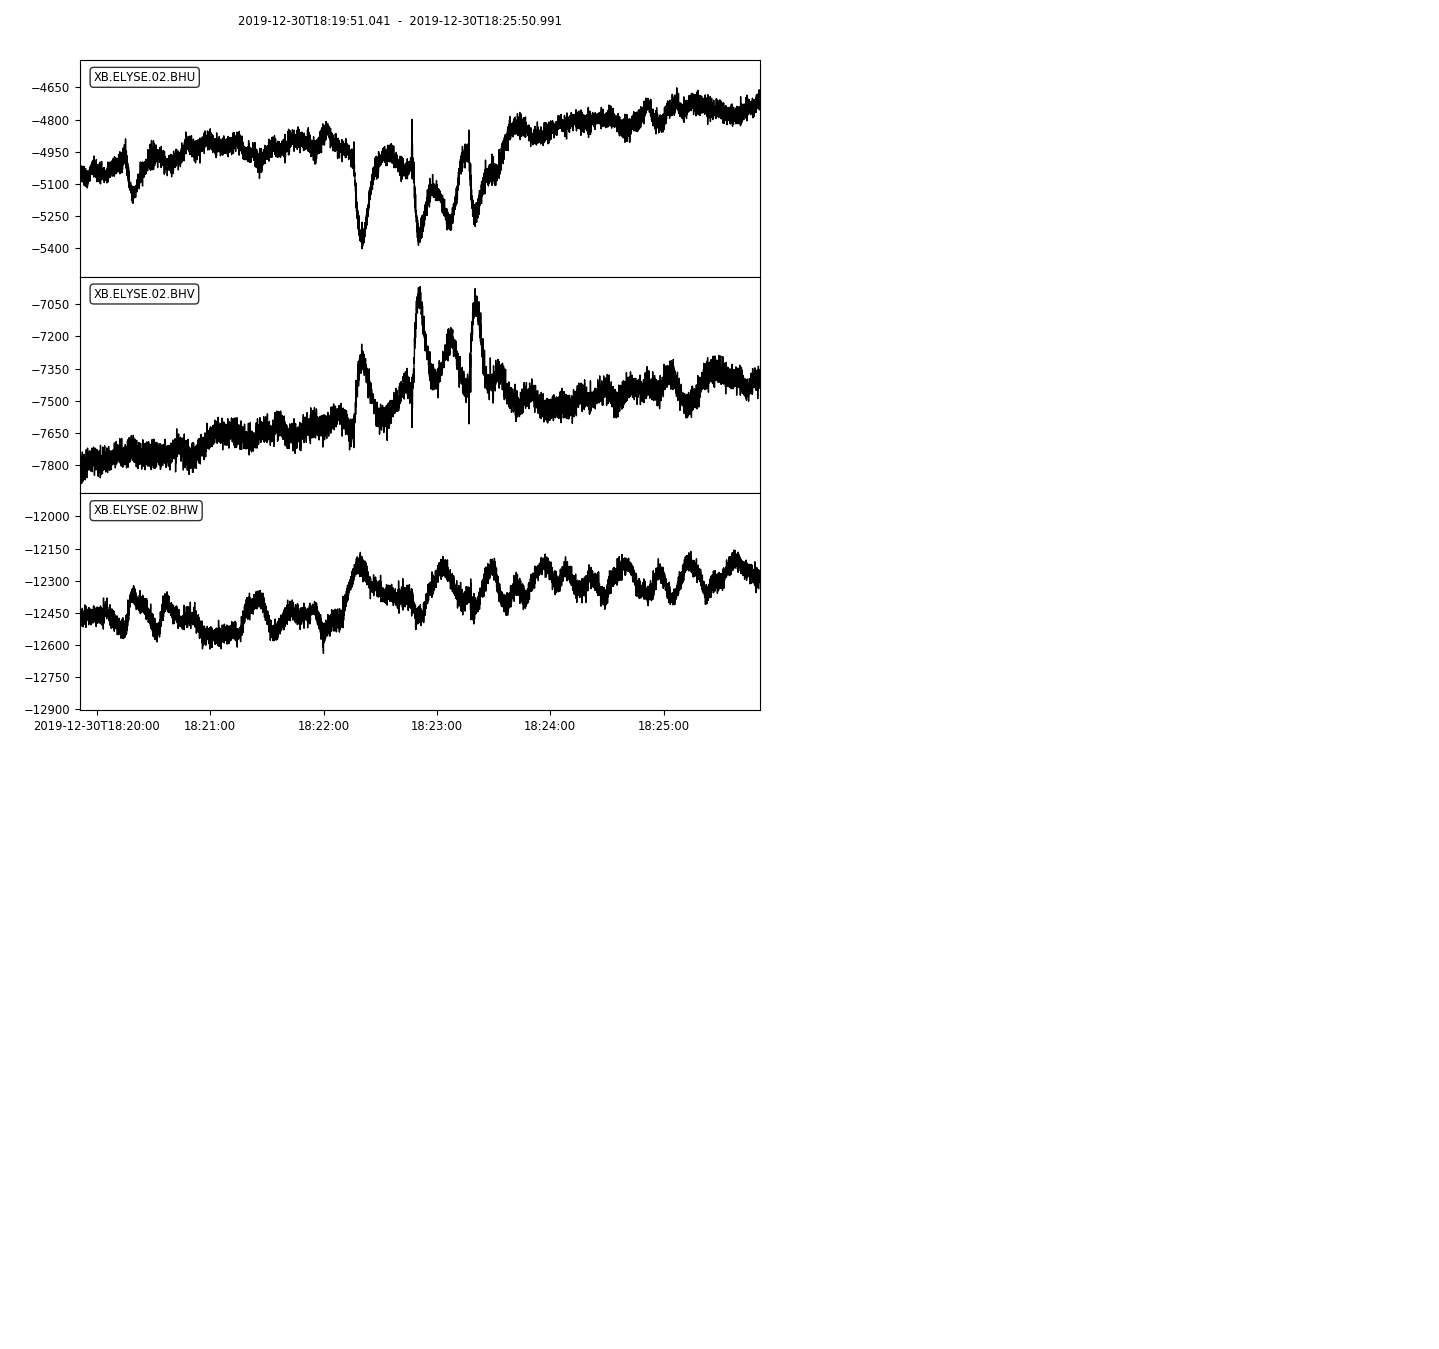

<IPython.core.display.Javascript object>


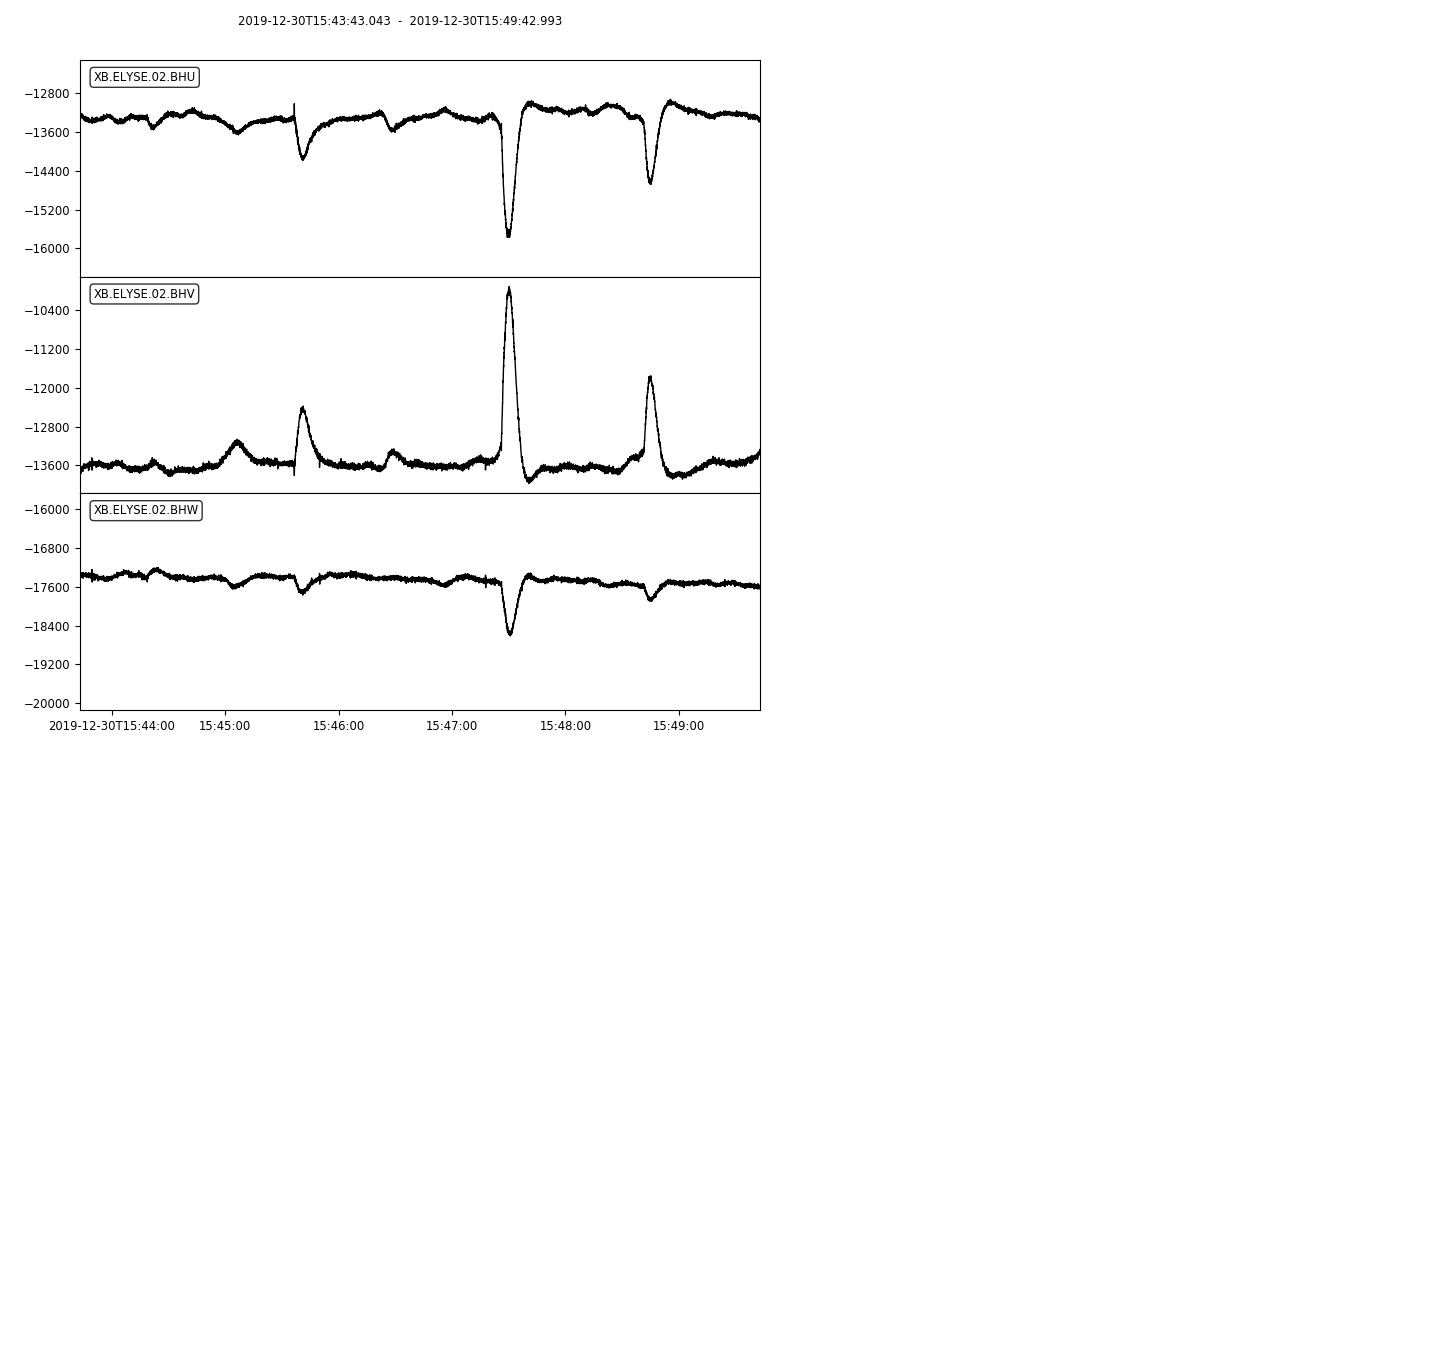

<IPython.core.display.Javascript object>


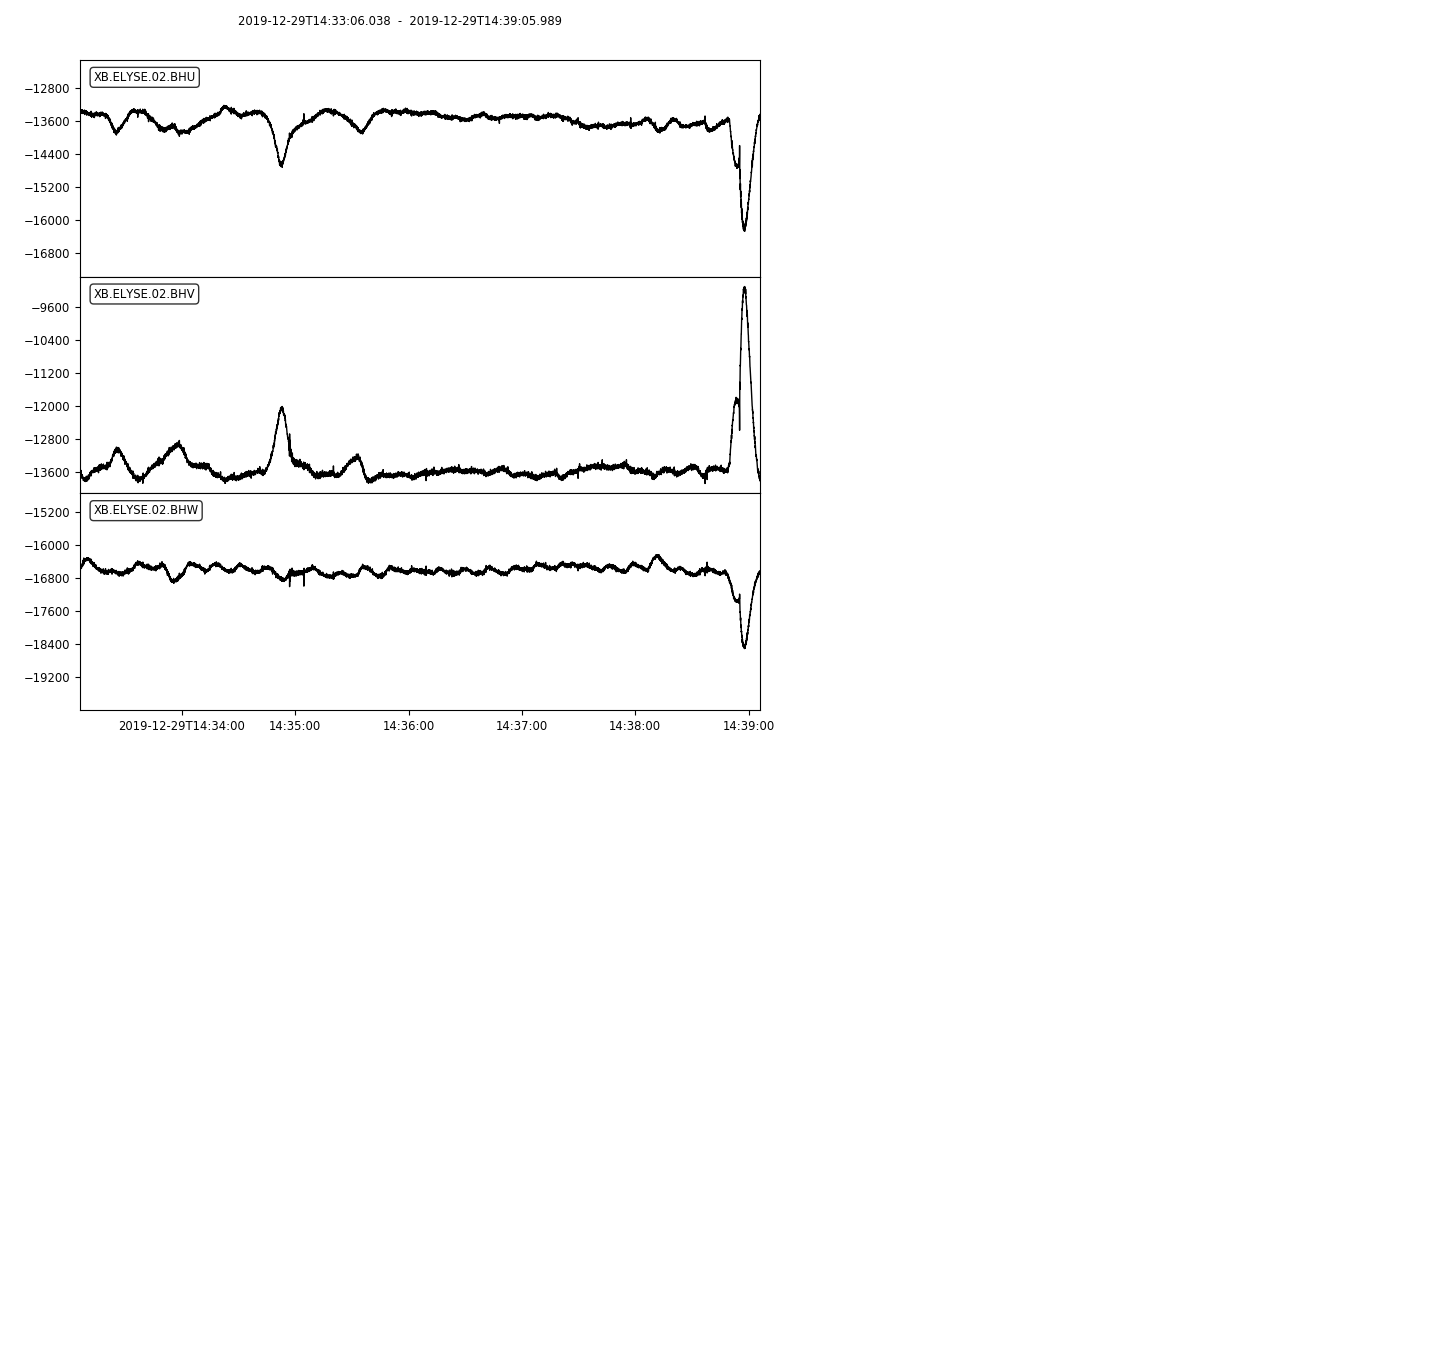

<IPython.core.display.Javascript object>


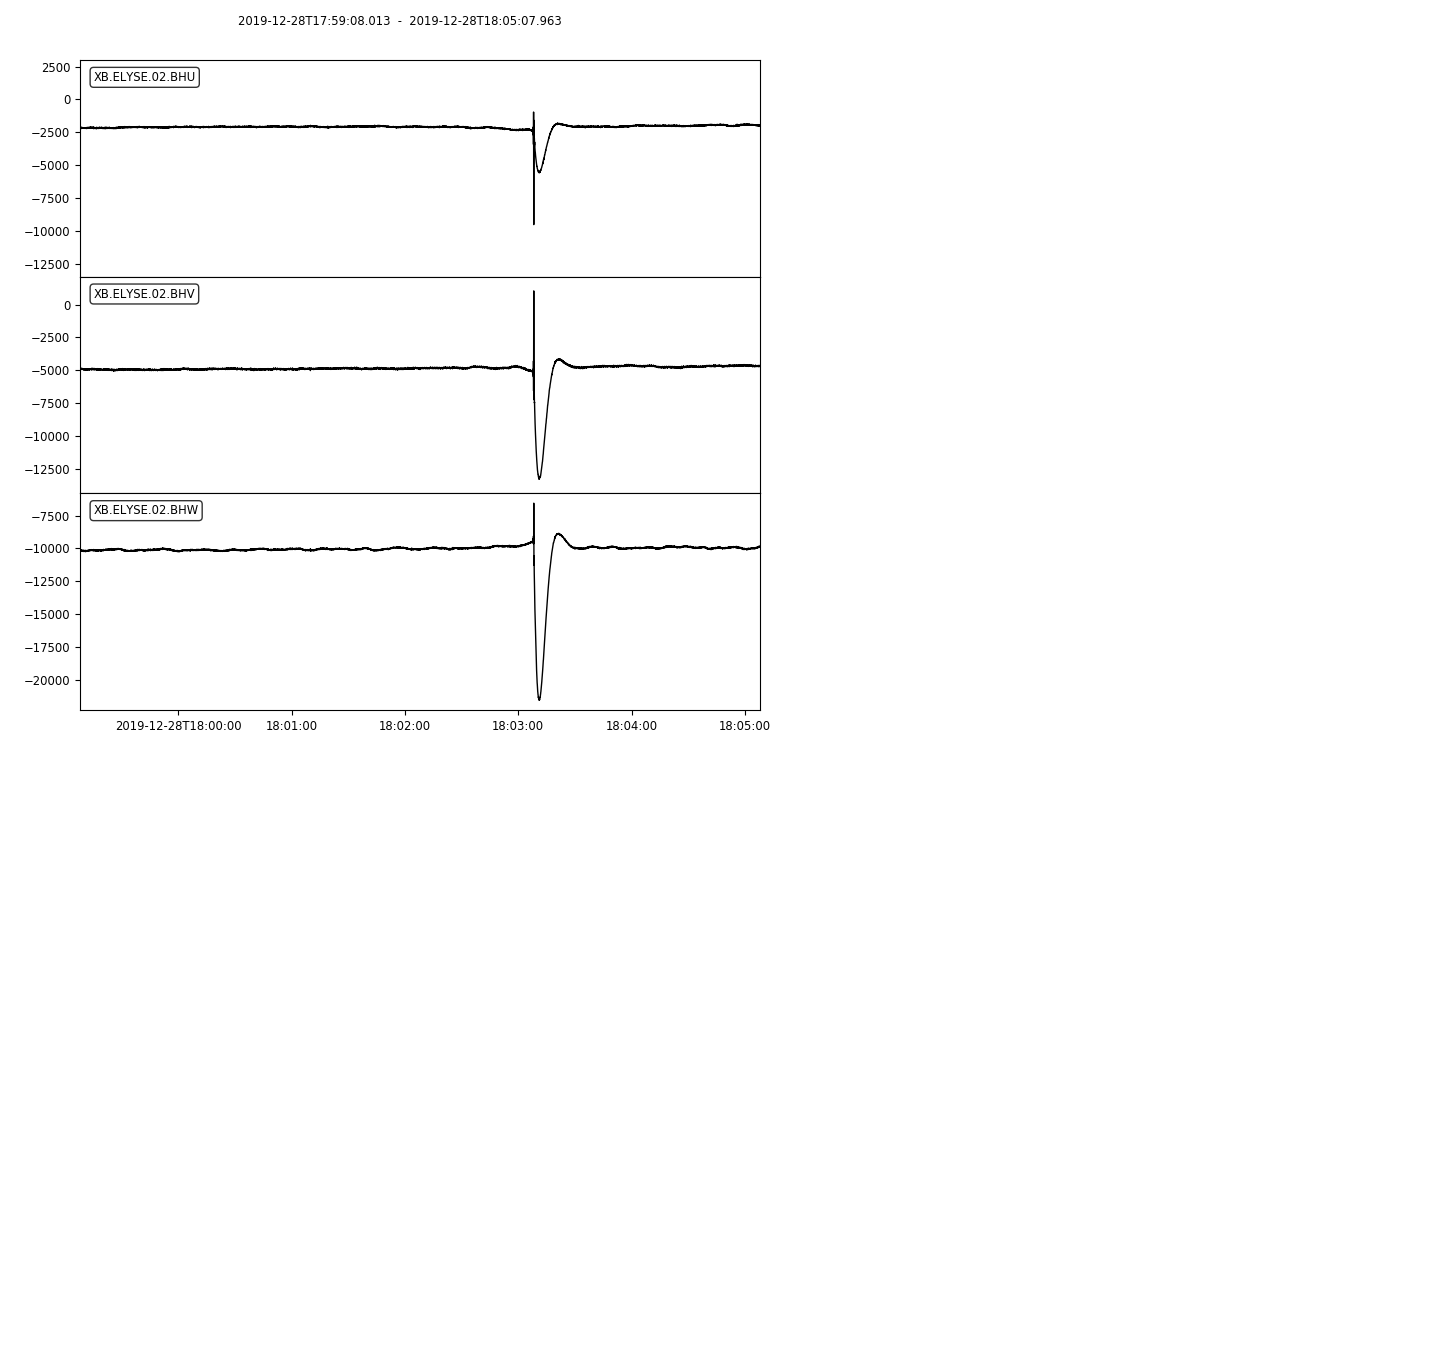

In [25]:
first_5 = event_times[0:5]
print(first_5)

for time in first_5:
    data = cat_waveforms(time, 3*60)
    data.plot()

In [50]:
f2 = open('marsquake_event.txt', 'w')

for time in first_5:
    str_time = str(time) + '\n'
    f2.write(str_time)

f2.close()

In [1]:
file = open('marsquake_event.txt', 'r')

from_file_times = []

for line in file:
    time = line.strip()
    UTCtime = UTCDateTime(time)
    from_file_times.append(UTCtime)
    
print(from_file_times)
print(type(from_file_times[0]))

2019-12-31T17:30:00.000000Z

2019-12-31T17:30:00.000000Z


NameError: name 'UTCDateTime' is not defined

<IPython.core.display.Javascript object>


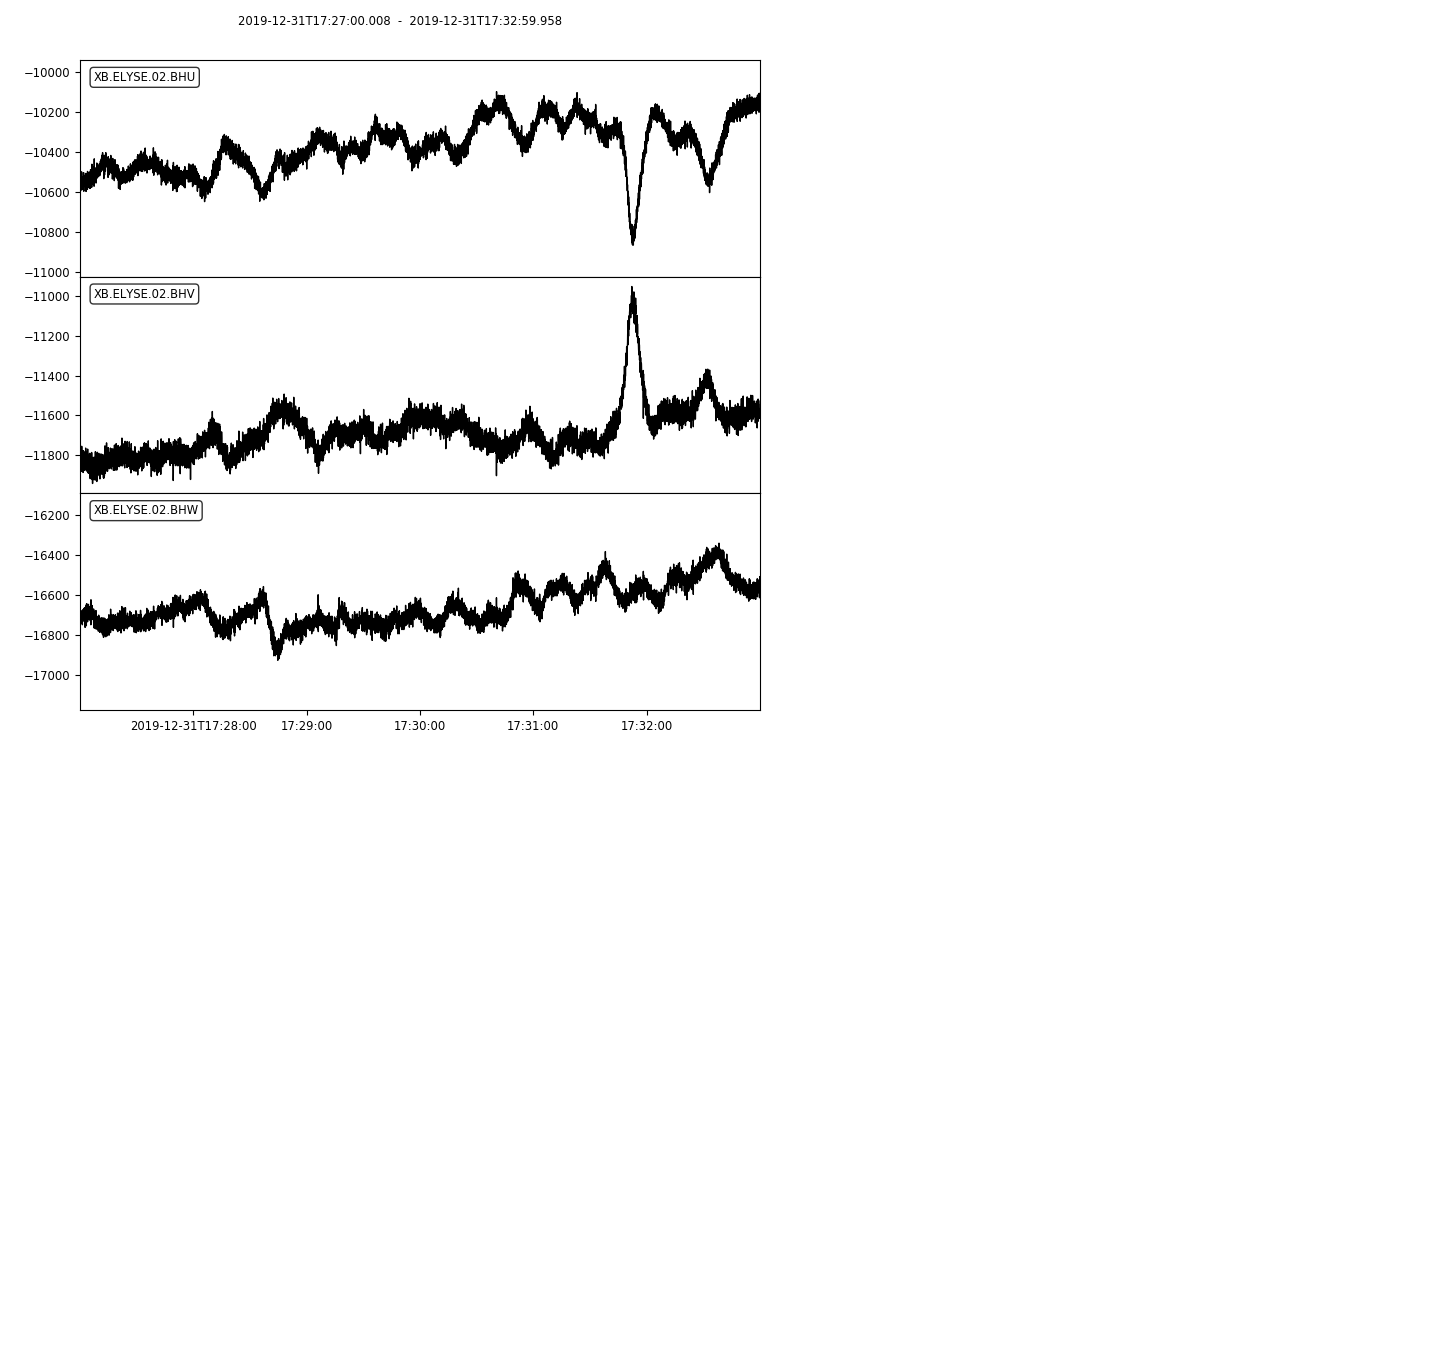

<IPython.core.display.Javascript object>


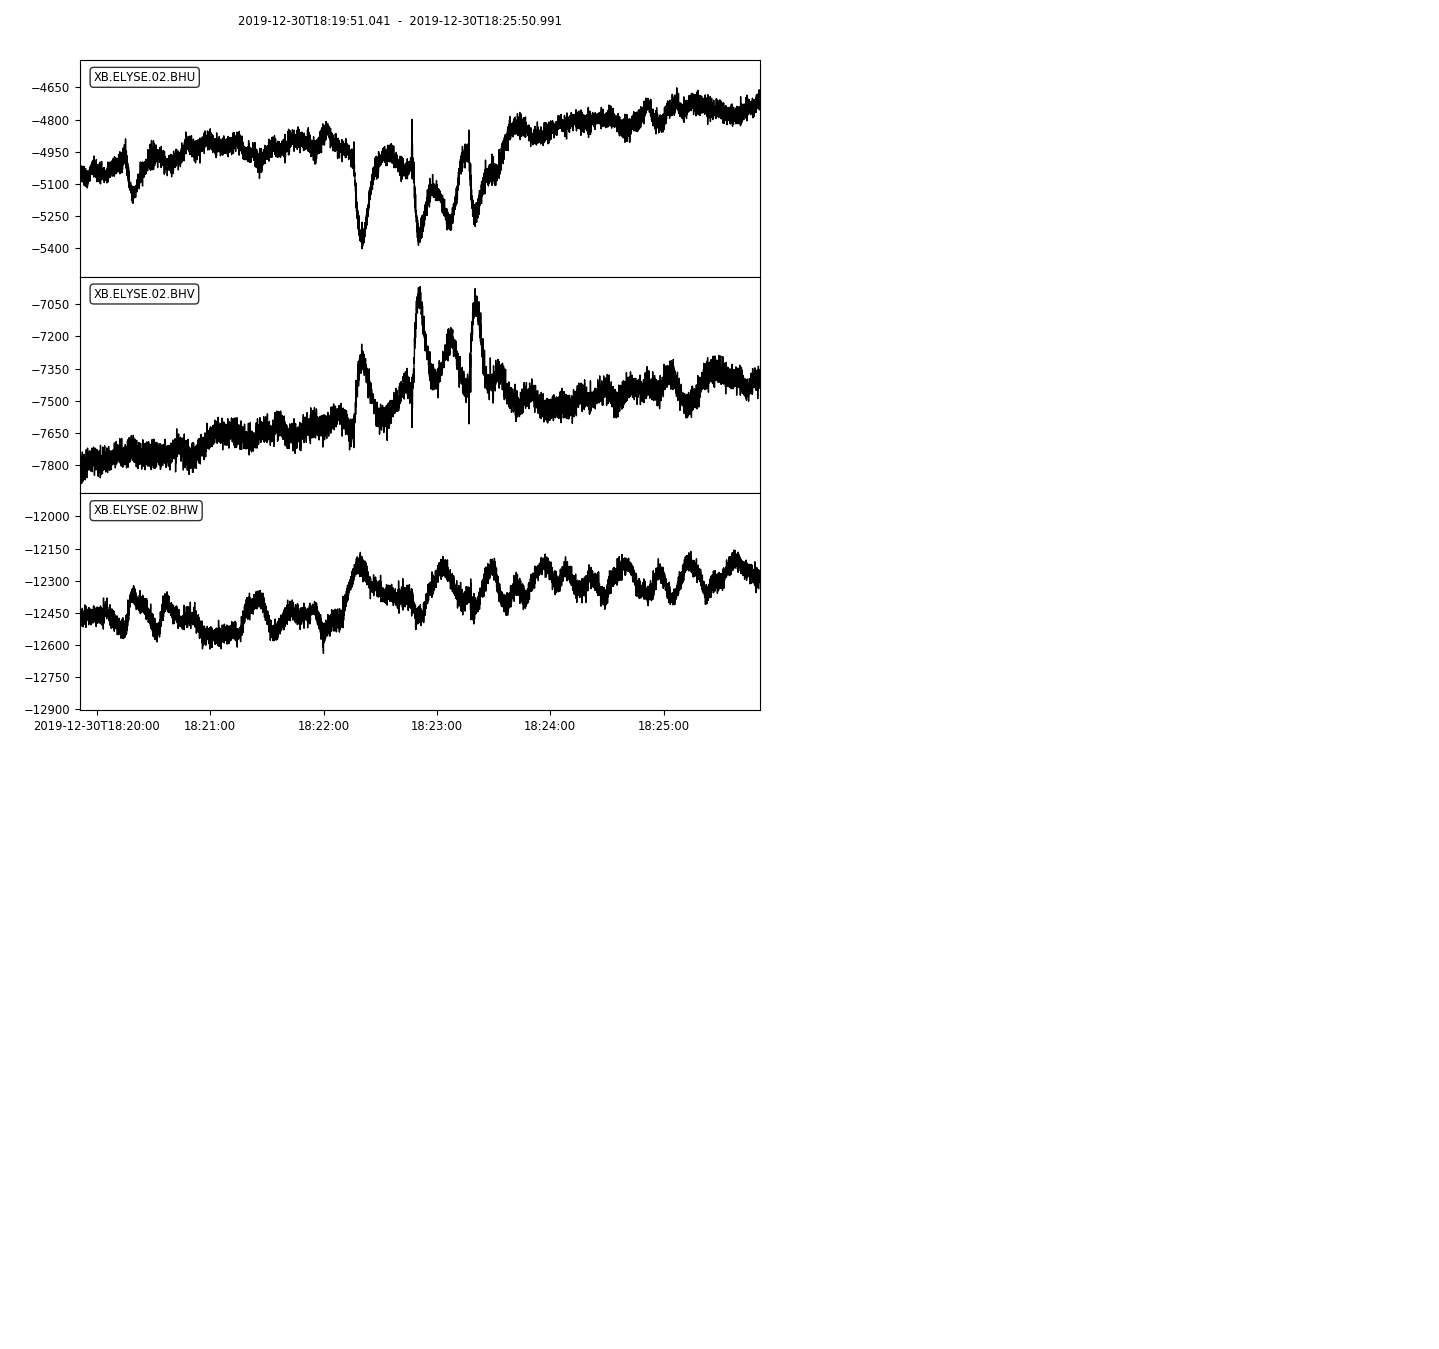

<IPython.core.display.Javascript object>


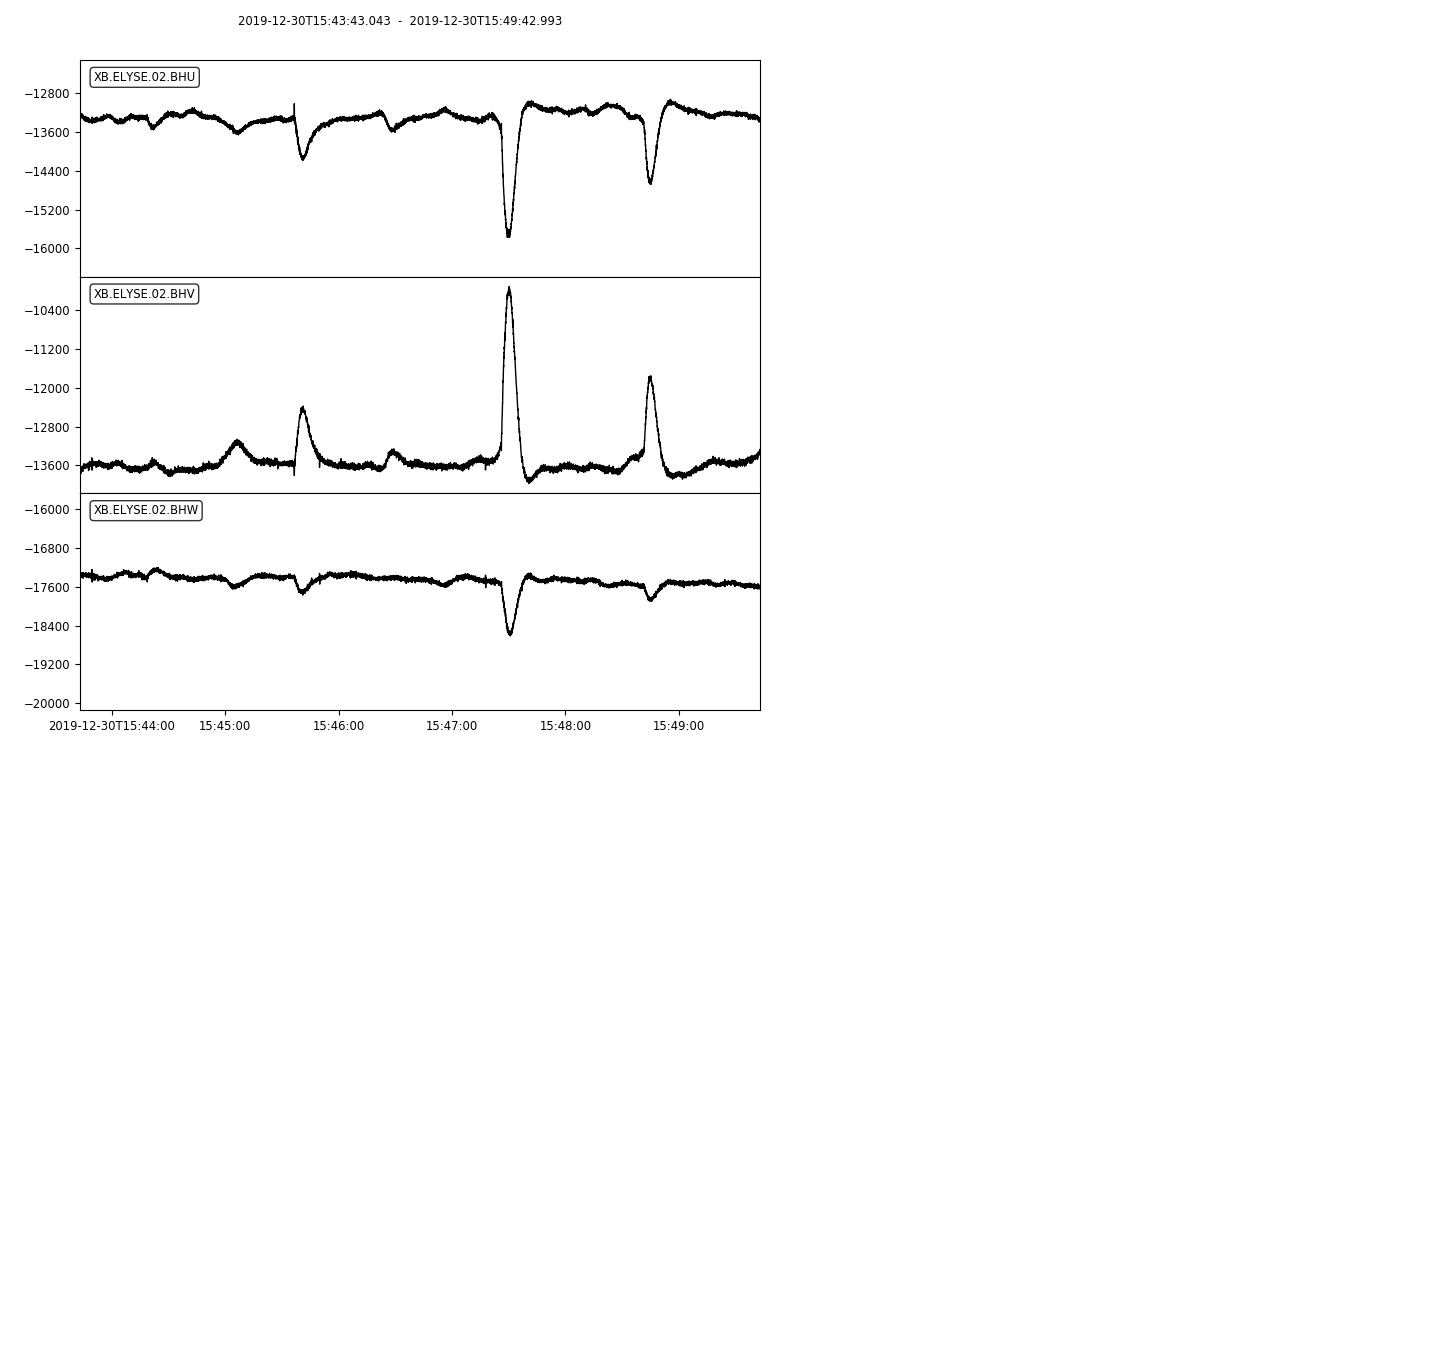

<IPython.core.display.Javascript object>


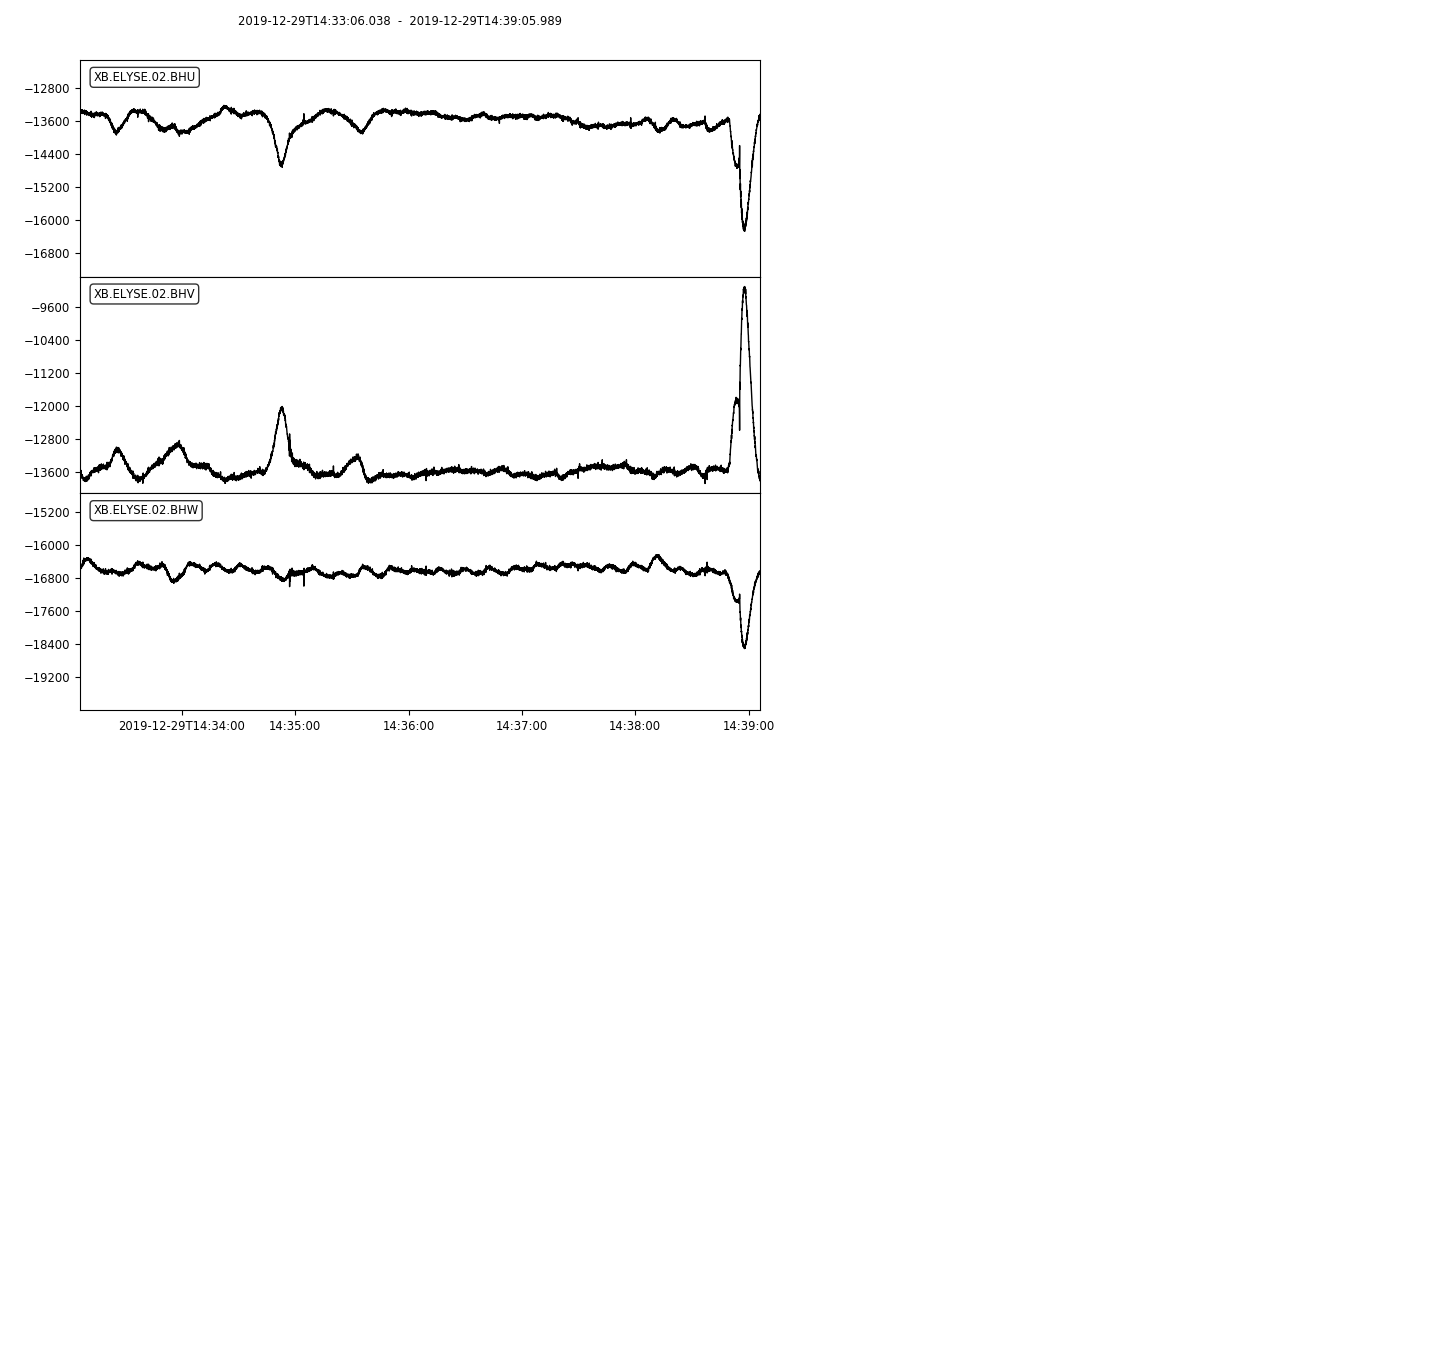

<IPython.core.display.Javascript object>


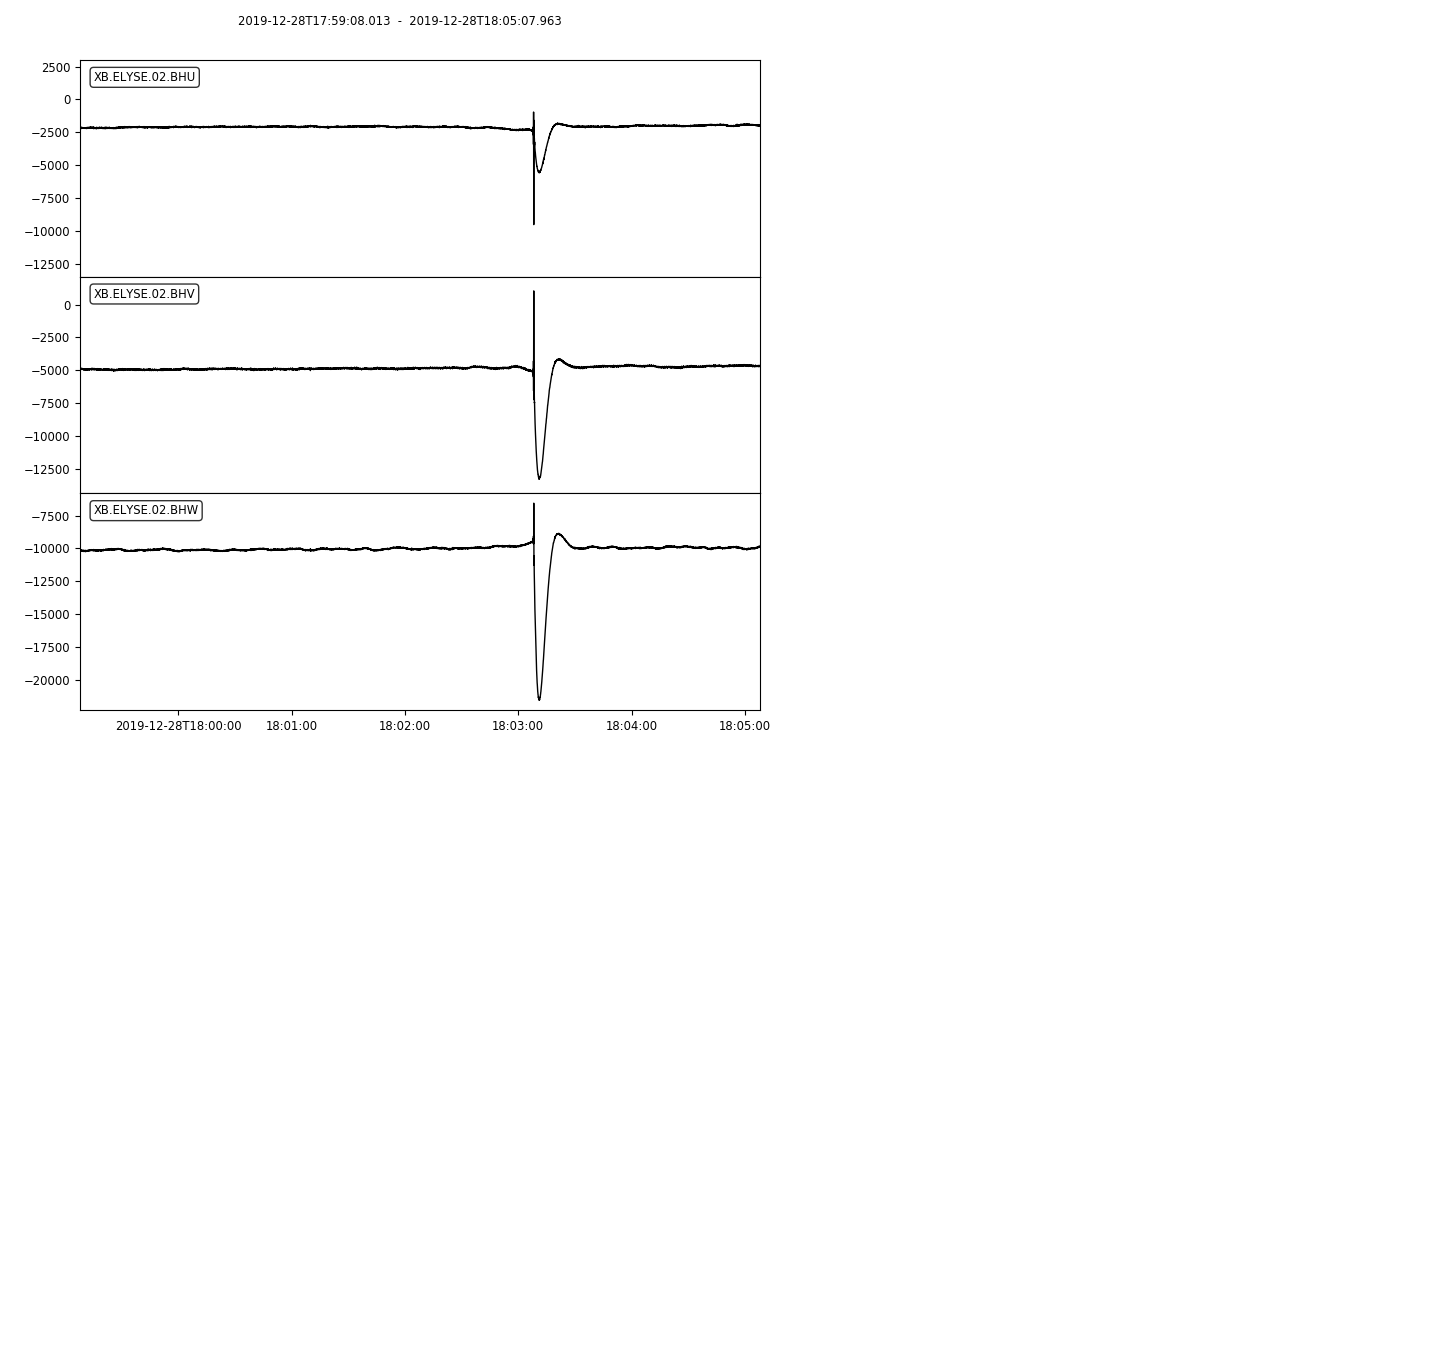

In [68]:
for t in from_file_times:
    wave = cat_waveforms(t, 3*60)
    wave.plot()

<IPython.core.display.Javascript object>


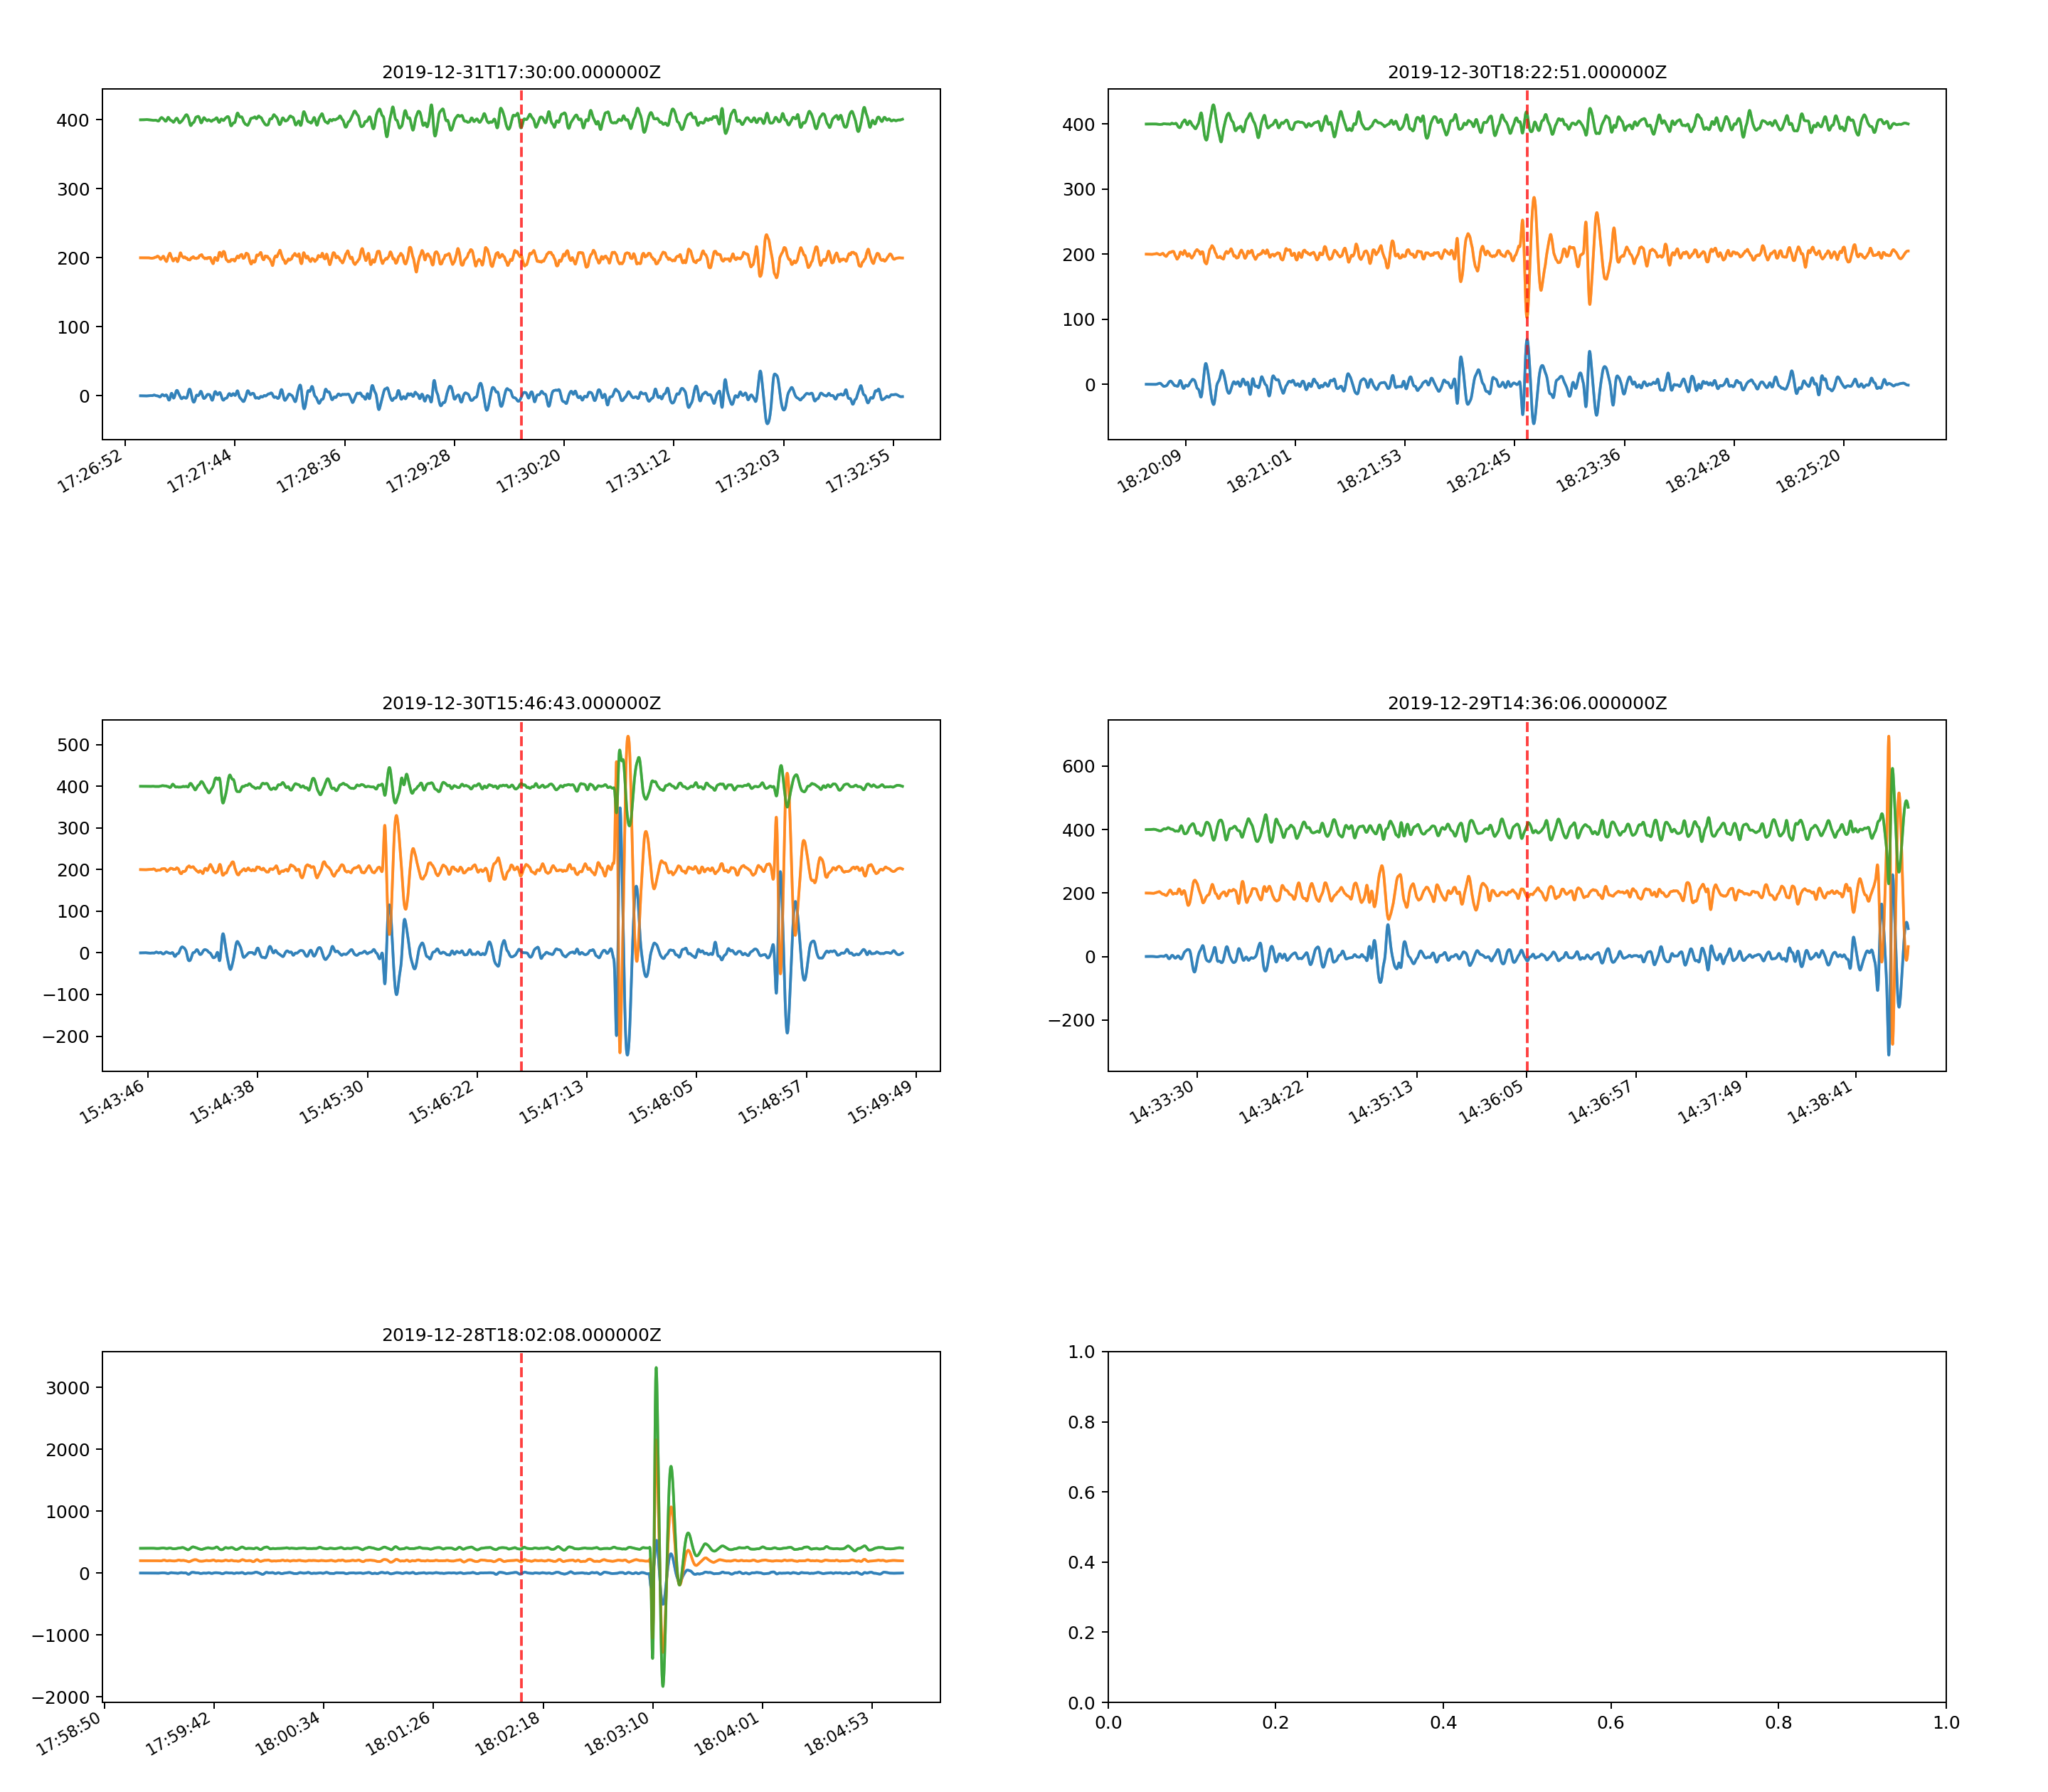

In [94]:
fig1,ax = plt.subplots(3,2, figsize=(16,14))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

In [96]:
def waveform_filter(stream, event_type):
    
    stream.detrend('linear')
    stream.taper(max_percentage=0.05, type='cosine')
    
    if event_type == 'lf' or 'bb':
        filtered_stream1 = stream.filter('bandpass', freqmin = 0.125, freqmax = 0.5)
        return filtered_stream1
    elif event_type == 'hf':
        filtered_stream2 = stream.filter('highpass', freq = 1)
        return filtered_stream2
    elif event_type == '2.4':
        filtered_stream3 = stream.filter('bandpass', freqmin = 1, freqmax = 4)
        return filtered_stream3
    elif event_type == 'shf':
        filtered_stream4 = stream.filter('bandpass', freqmin = 8, freqmax = 15)
        return filtered_stream4
    elif event_type == 'vhf':
        filtered_stream5 = stream.filter('bandpass', freqmin == 5, freqmax = 10)
        return filtered_stream5
    else:
        text = "This isn't a valid event type"
        return text

def waveform_plotter(date, filtered, ax, ylim = False, channels = [0,1,2]):
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        offset = channel * np.full(len(filtered[channel]), fill_value=200) 
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#1f77b4", alpha = 0.7)
        elif code == 'BHV':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#ff7f0e", alpha = 0.7)
        elif code == 'BHW':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#2ca02c", alpha = 0.7)
        else:
            ax.plot(t, filtered[channel].data + offset, label="Unknown " + code, color = "black", alpha = 0.7)
    
    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
    ax.set_title(date, size=10)
    
    ax.axvline(pd.to_datetime(date), c='r', ls='--', alpha = 0.5)
    
    if ylim == True:
        ax.set_ylim(-800,1000)

k = 0
for num in range(0,3):
    for numb in range(0,2):
        if k < len(from_file_times):
            t = from_file_times[k]
            try:
                wave = cat_waveforms(t, 3*60)
                filt = waveform_filter(wave, 'hf')
                waveform_plotter(str(t), filt, ax[num,numb])
                print(num, numb, t, k)
            except:
                print('Error occured', t)
            k += 1

0 0 2019-12-31T17:30:00.000000Z 0
0 1 2019-12-30T18:22:51.000000Z 1
1 0 2019-12-30T15:46:43.000000Z 2
1 1 2019-12-29T14:36:06.000000Z 3
2 0 2019-12-28T18:02:08.000000Z 4
